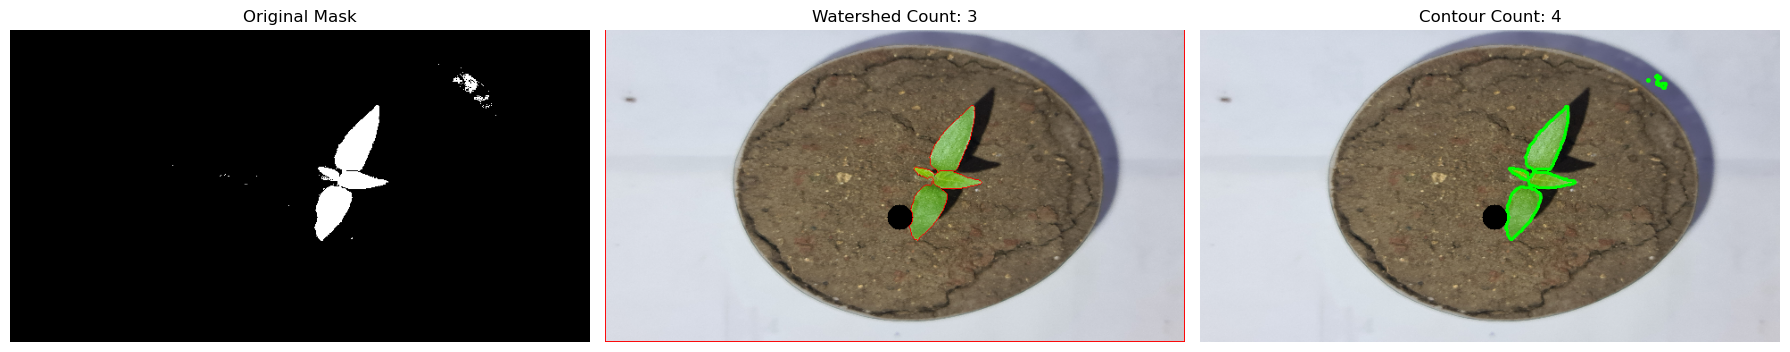

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('11.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 330, 210
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day12

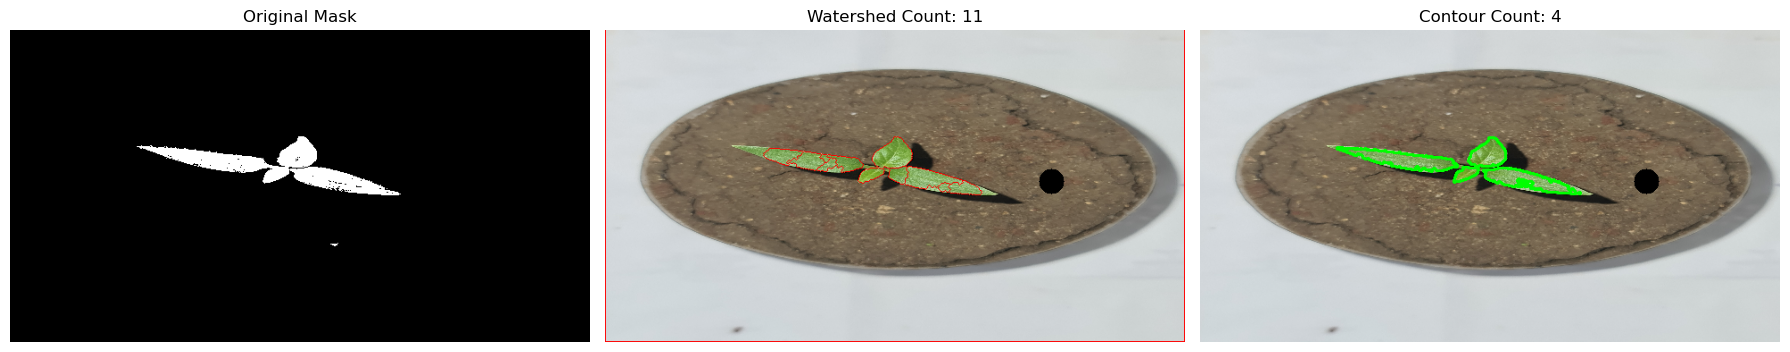

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('12.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 500, 170
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day6

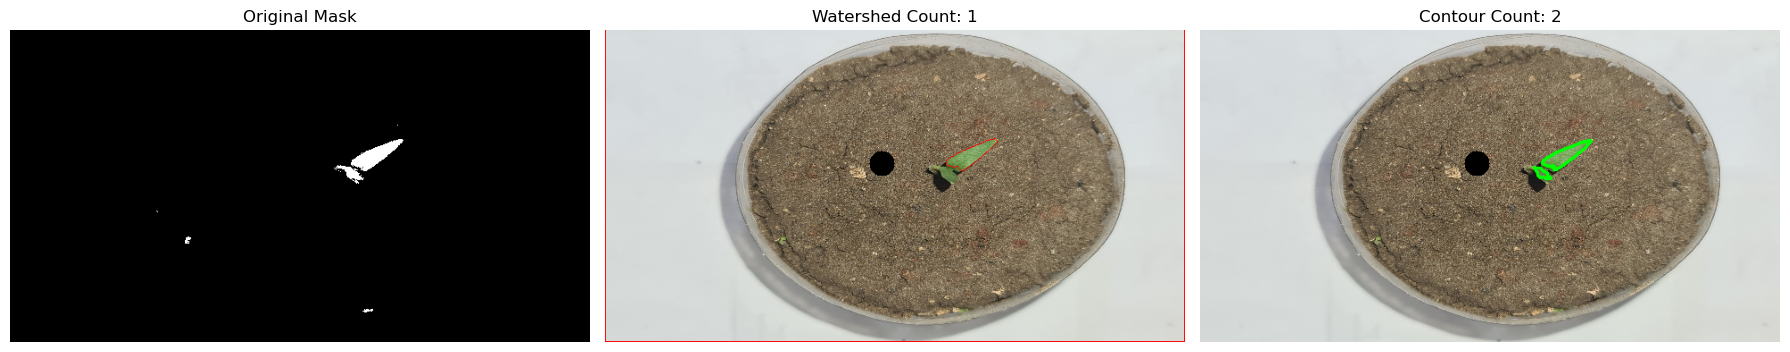

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('6.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 310, 150
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day5

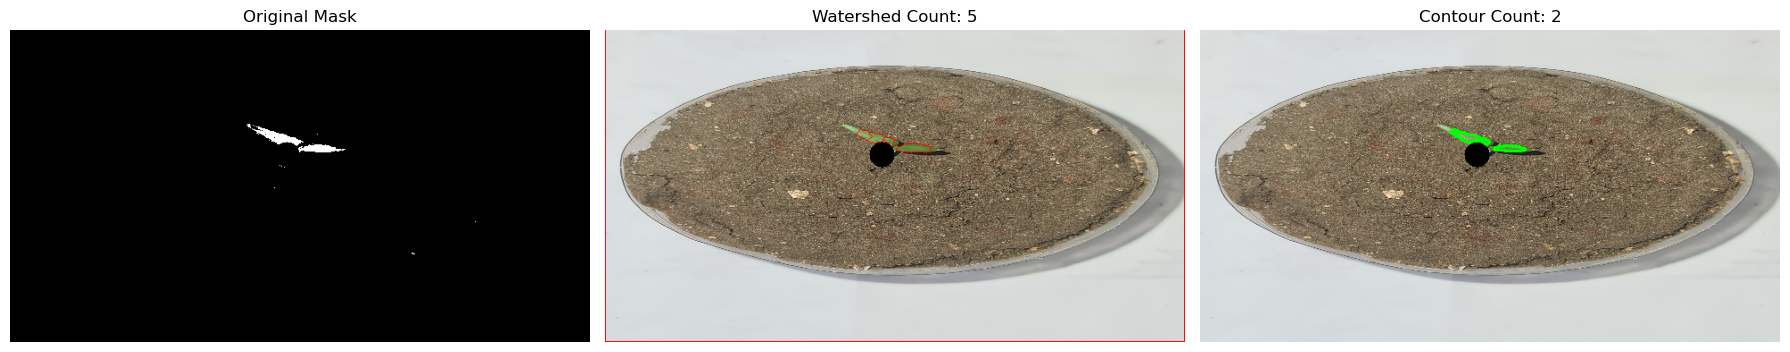

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('5.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 310, 140
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day8

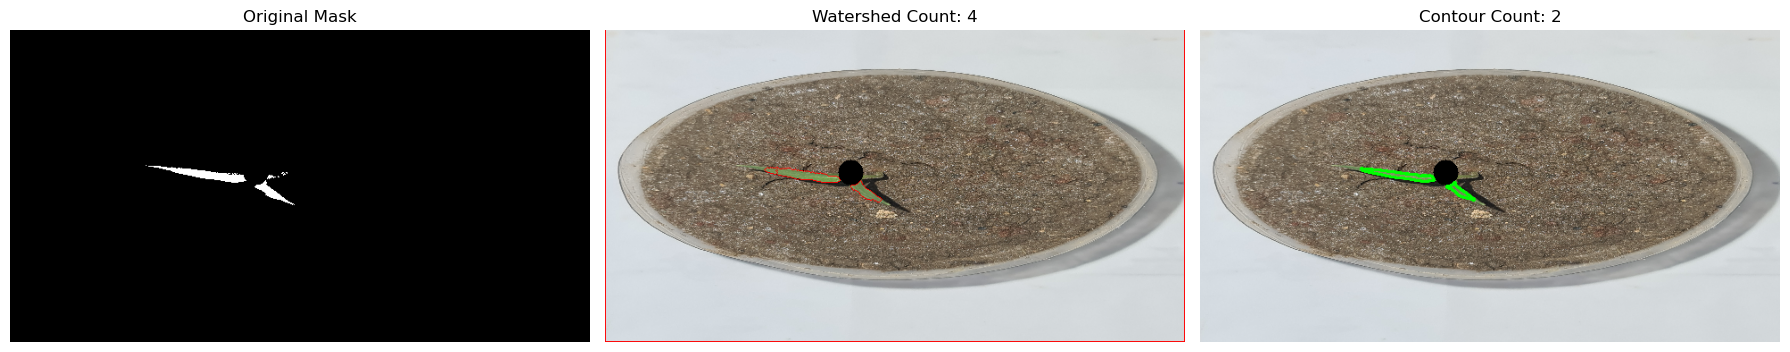

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('8.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 275, 160
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day14

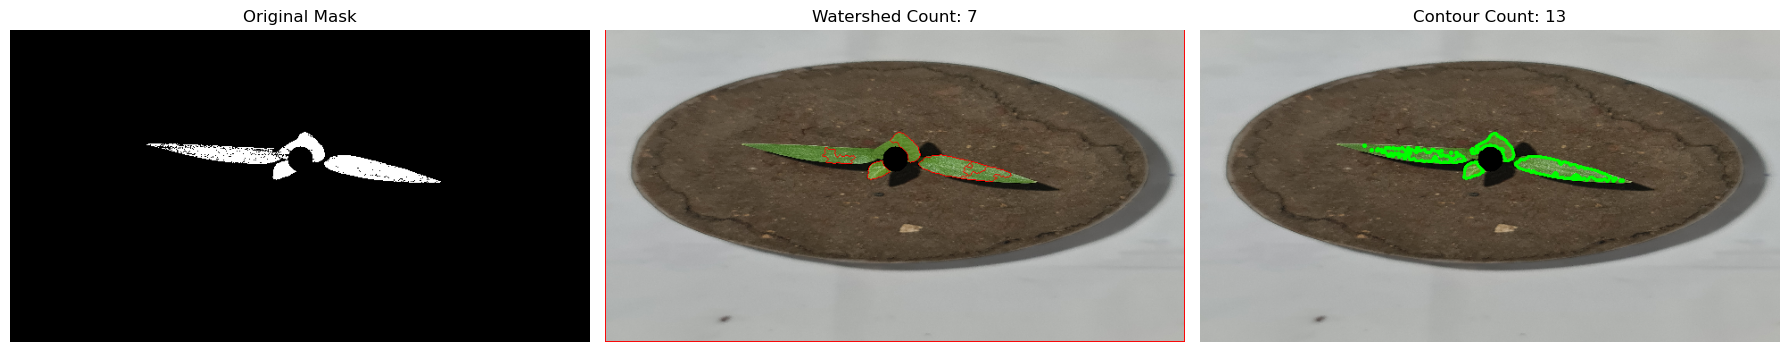

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('14.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 325, 145
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day7

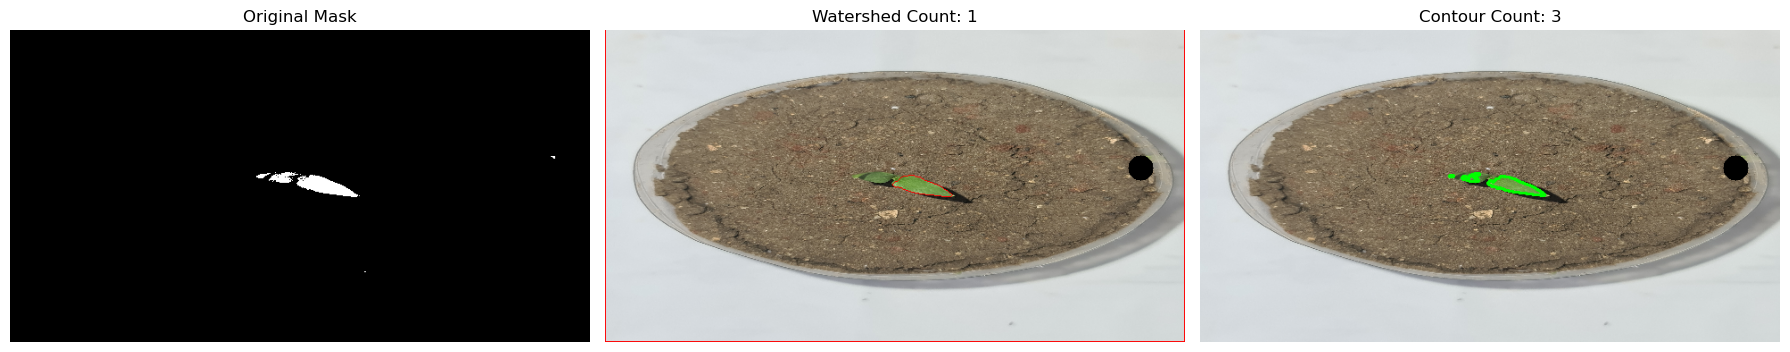

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('7.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 600, 155
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day4

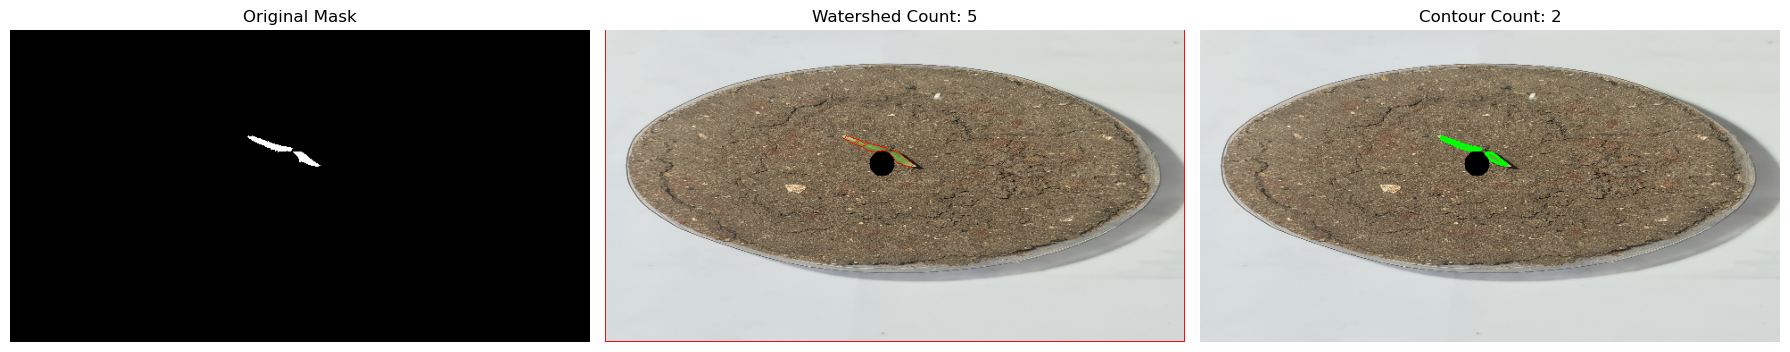

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('4.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 310, 150
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day9

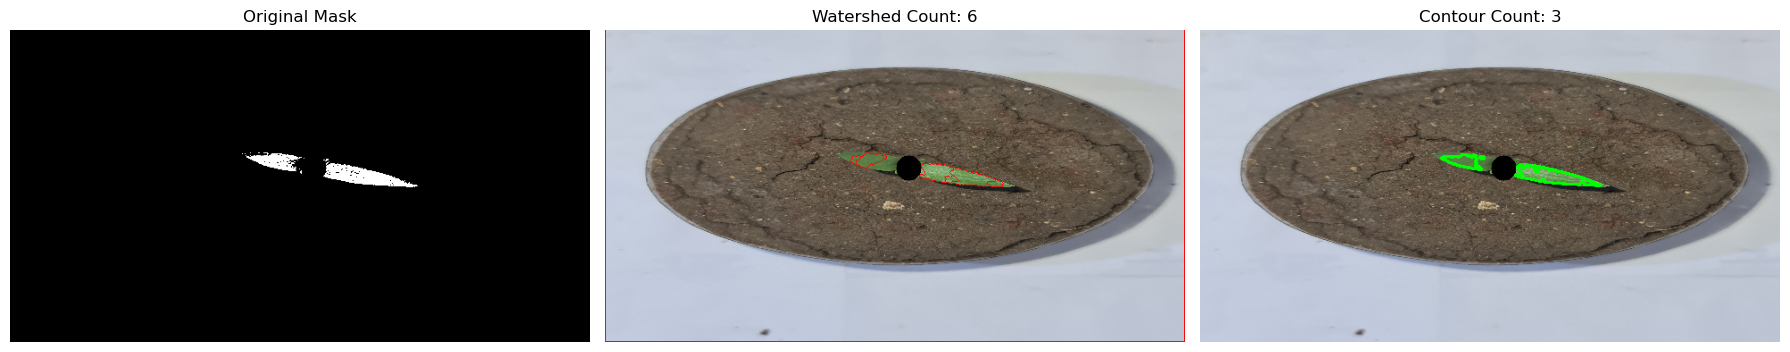

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('9.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 340, 155
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#day10

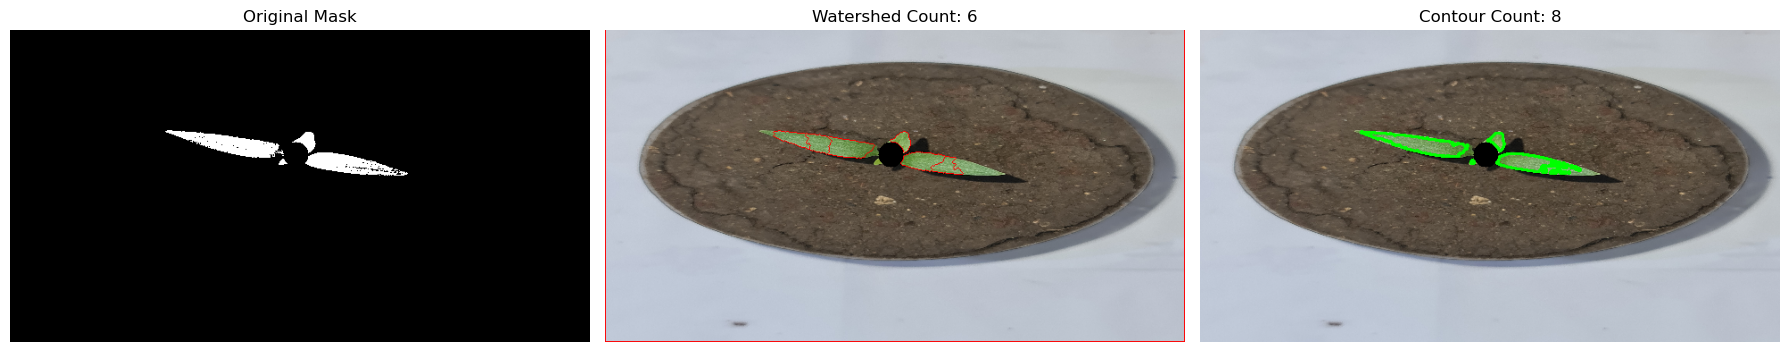

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('10.jpg') 
image = cv2.resize(image, (650, 350))

# Draw a black circle in the center (optional masking)
center_x, center_y = 320, 140
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# Convert to HSV and create mask
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour count
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Background and foreground extraction
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]  # mark boundaries in red

# Count unique leaf segments
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Color different segments
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting results
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
#day13

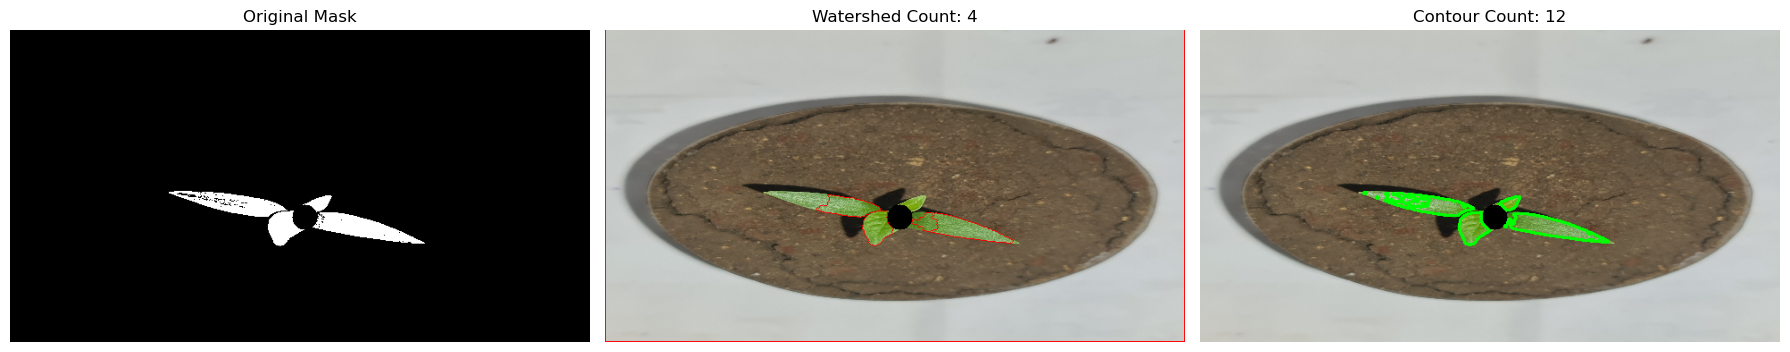

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('13.jpg') 
image = cv2.resize(image, (650, 350))

# Mask out center (optional)
center_x, center_y = 330, 210
cv2.circle(image, (center_x, center_y), radius=14, color=(0, 0, 0), thickness=-1)

# HSV masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_hsv = np.array([23, 72, 119])
upper_hsv = np.array([179, 255, 255])
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_leaf_count = len(contours)

# Watershed: Sure background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_marked = image.copy()
markers = cv2.watershed(image_marked, markers)
image_marked[markers == -1] = [0, 0, 255]

# Extract leaf labels
unique_labels = np.unique(markers)
leaf_labels = [label for label in unique_labels if label > 1]
watershed_leaf_count = len(leaf_labels)

# Optional: color segmented regions
colored_regions = np.zeros_like(image)
for label in leaf_labels:
    color = np.random.randint(0, 255, size=3)
    colored_regions[markers == label] = color

# Plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.title("Original Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Watershed Count: {watershed_leaf_count}")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contour Count: {contour_leaf_count}")
contour_display = image.copy()
cv2.drawContours(contour_display, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
